In [13]:
import pickle
import requests
import numpy as np
import cv2
import base64, io
from matplotlib import pyplot as plt

In [29]:
def encode_image_to_bytes(img):
    _, im_arr = cv2.imencode('.jpg', img)
    im_bytes = im_arr.tobytes()
    im_b64 = base64.b64encode(im_bytes)
    return im_b64

In [30]:
%matplotlib inline
def prepare_image_and_send(image_path):
    img = cv2.imread(image_path)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    imgplot = plt.imshow(img)
    plt.show()
    
    im_enc = encode_image_to_bytes(img)
    content = [im_enc]
    dict_content = {"image": content}
    url='http://127.0.0.1:5000/api/1.0/inference'
    x = requests.post(url, data = dict_content)
    return x   
    

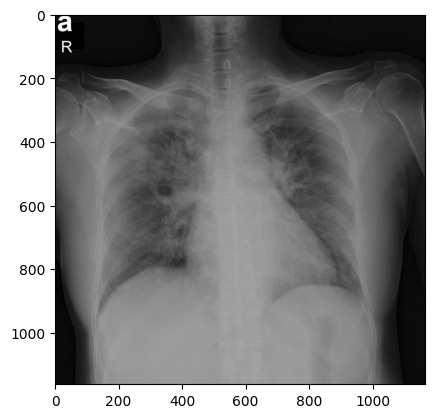

<Response [200]>
{'class': 'covid', 'probabilidades': '[[0.9854146  0.01458539]]'}


In [36]:
x = prepare_image_and_send("test_images/1-s2.0-S0929664620300449-gr2_lrg-a.jpg")
# img = cv2.imread("test_images/1-s2.0-S0929664620300449-gr2_lrg-a.jpg")
# imgplot = plt.imshow(img)
# plt.show()
print(x)
print(x.json())

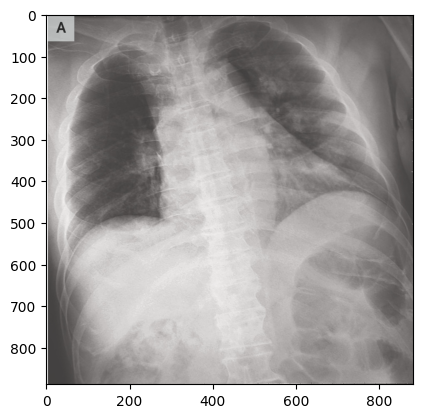

<Response [200]>
{'class': 'covid', 'probabilidades': '[[0.96826774 0.03173224]]'}


In [37]:
x = prepare_image_and_send("test_images/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg")
print(x)
print(x.json())

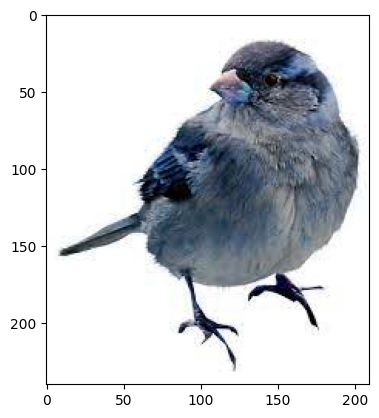

<Response [200]>
{'class': 'covid', 'probabilidades': '[[9.9996269e-01 3.7284215e-05]]'}


In [38]:
x = prepare_image_and_send("test_images/bird.jpeg")
print(x)
print(x.json())